In [2]:
import pandas as pd
import seaborn as sns

In [4]:
data = pd.read_csv('C:\\Users\\Lumia520\\Desktop\\Datasets\\titanic.csv')
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


<Axes: xlabel='Pclass', ylabel='Count'>

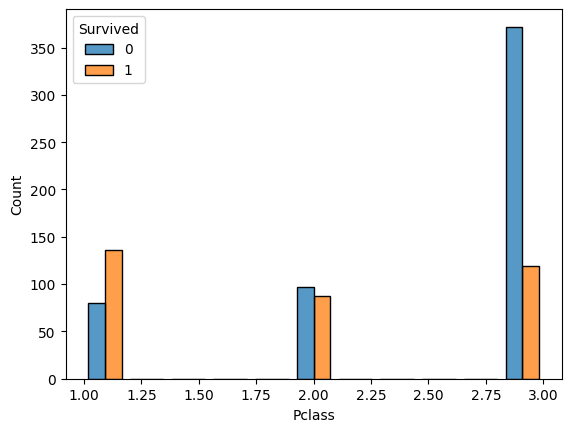

In [5]:
sns.histplot(data = data, x = 'Pclass', hue = 'Survived', shrink = 0.8, multiple= 'dodge')

<Axes: xlabel='Sex', ylabel='Count'>

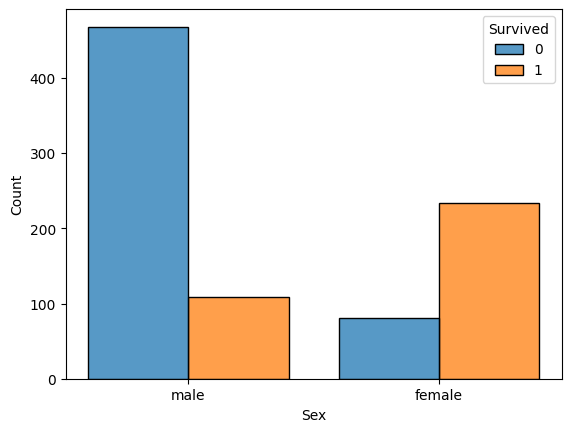

In [6]:
sns.histplot(data = data, x = 'Sex', hue = 'Survived', shrink = 0.8, multiple= 'dodge')

<Axes: xlabel='Age', ylabel='Count'>

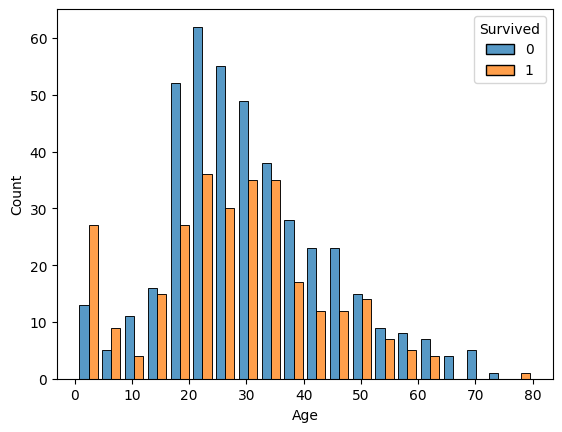

In [7]:
sns.histplot(data = data, x = 'Age', hue = 'Survived', shrink = 0.8, multiple= 'dodge')

In [11]:
X = data[['Pclass', 'Sex', 'Age', 'Fare']]
X

,Pclass,Sex,Age,Fare
0,3,male,22.0,7.2500
1,1,female,38.0,71.2833
2,3,female,26.0,7.9250
3,1,female,35.0,53.1000
4,3,male,35.0,8.0500
...,...,...,...,...
886,2,male,27.0,13.0000
887,1,female,19.0,30.0000
888,3,female,NaN,23.4500
889,1,male,26.0,30.0000


In [16]:
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()

In [21]:
X['Sex_new'] = encoder.fit_transform(X['Sex'])
X = X.drop('Sex', axis= 'columns')
X

C:\Users\Lumia520\AppData\Local\Temp\ipykernel_5284\55042180.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X['Sex_new'] = encoder.fit_transform(X['Sex'])


,Pclass,Age,Fare,Sex_new
0,3,22.0,7.2500,1
1,1,38.0,71.2833,0
2,3,26.0,7.9250,0
3,1,35.0,53.1000,0
4,3,35.0,8.0500,1
...,...,...,...,...
886,2,27.0,13.0000,1
887,1,19.0,30.0000,0
888,3,NaN,23.4500,0
889,1,26.0,30.0000,1


In [22]:
y = data.Survived
y

0      0
1      1
2      1
3      1
4      0
      ..
886    0
887    1
888    0
889    1
890    0
Name: Survived, Length: 891, dtype: int64

In [23]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2)

In [26]:
from sklearn import tree
model = tree.DecisionTreeClassifier(criterion='entropy')
model.fit(X_train,y_train)

DecisionTreeClassifier(criterion='entropy')

In [27]:
model.score(X_test,y_test)

0.8268156424581006